<a href="https://colab.research.google.com/github/JuanJoseCardenas/PDS-Notebooks/blob/master/No_recursive_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

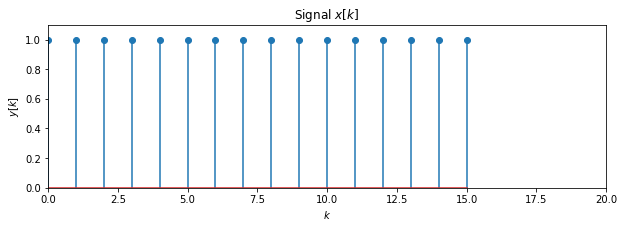

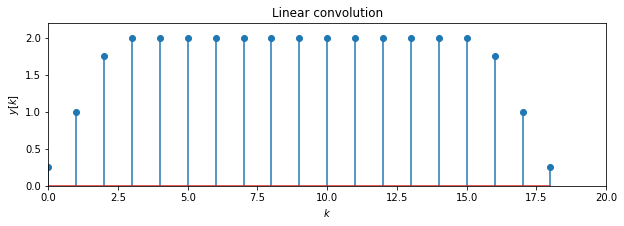

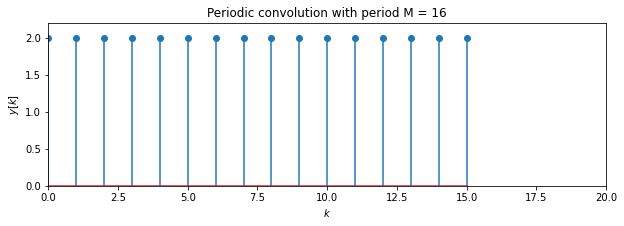

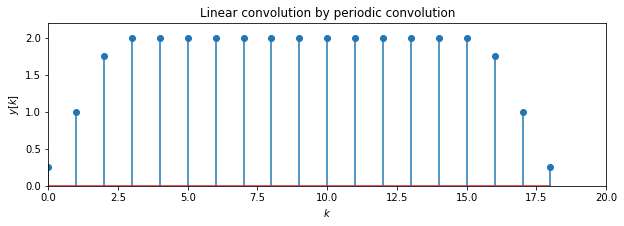

In [ ]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

L = 16  # length of signal x[k]
N = 4  # length of signal h[k]
M = 16  # periodicity of periodic convolution


def periodic_summation(x, N):
    "Zero-padding to length N or periodic summation with period N."
    M = len(x)
    rows = int(np.ceil(M/N))
    
    if (M < int(N*rows)):
        x = np.pad(x, (0, int(N*rows-M)), 'constant')
    
    x = np.reshape(x, (rows, N))
    
    return np.sum(x, axis=0)


def periodic_convolve(x, y, P):
    "Periodic convolution of two signals x and y with period P."
    x = periodic_summation(x, P)
    h = periodic_summation(y, P)

    return np.array([np.dot(np.roll(x[::-1], k+1), h) for k in range(P)], float)


# generate signals
x = np.ones(L)
h = sig.triang(N)

# linear convolution
y1 = np.convolve(x, h, 'full')
# periodic convolution
y2 = periodic_convolve(x, h, M)
# linear convolution via periodic convolution
xp = np.append(x, np.zeros(N-1))
hp = np.append(h, np.zeros(L-1))
y3 = periodic_convolve(xp, hp, L+N-1)

# plot results
def plot_signal(x):
    plt.figure(figsize = (10, 3))
    plt.stem(x)
    plt.xlabel(r'$k$')
    plt.ylabel(r'$y[k]$')
    plt.axis([0, N+L, 0, 1.1*x.max()])


plot_signal(x)
plt.title('Signal $x[k]$')
plot_signal(y1)
plt.title('Linear convolution')
plot_signal(y2)
plt.title('Periodic convolution with period M = %d' %M)
plot_signal(y3)
plt.title('Linear convolution by periodic convolution');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


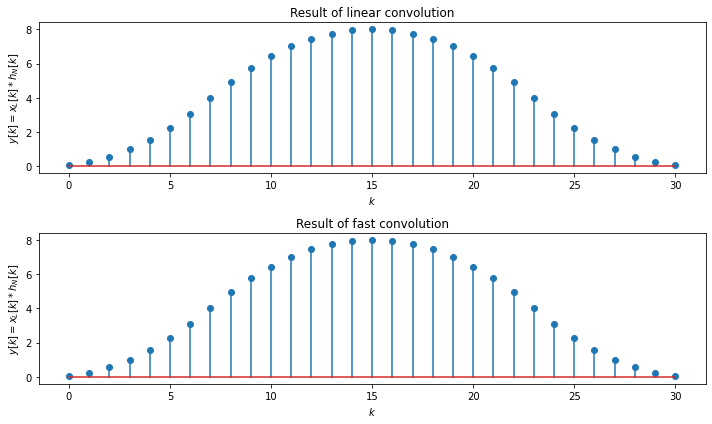

In [ ]:
L = 16  # length of signal x[k]
N = 16  # length of signal h[k]
M = N+L-1

# generate signals
x = np.ones(L)
h = sig.triang(N)

# linear convolution
y1 = np.convolve(x, h, 'full')
# fast convolution
y2 = np.fft.ifft(np.fft.fft(x, M) * np.fft.fft(h, M))

plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.stem(y1)
plt.xlabel(r'$k$')
plt.ylabel(r'$y[k] = x_L[k] * h_N[k]$')
plt.title('Result of linear convolution')

plt.subplot(212)
plt.stem(y1)
plt.xlabel(r'$k$')
plt.ylabel(r'$y[k] = x_L[k] * h_N[k]$')
plt.title('Result of fast convolution')
plt.tight_layout()



*   Change the lengths L, N and M and check how the results for the different convolutions change.

Al modificar los valores de N se modifica el tamaño de h[k] haciendolo mas pequeño o mas grande, al modificar el valor de L el tamaño de la convolucion cambia.



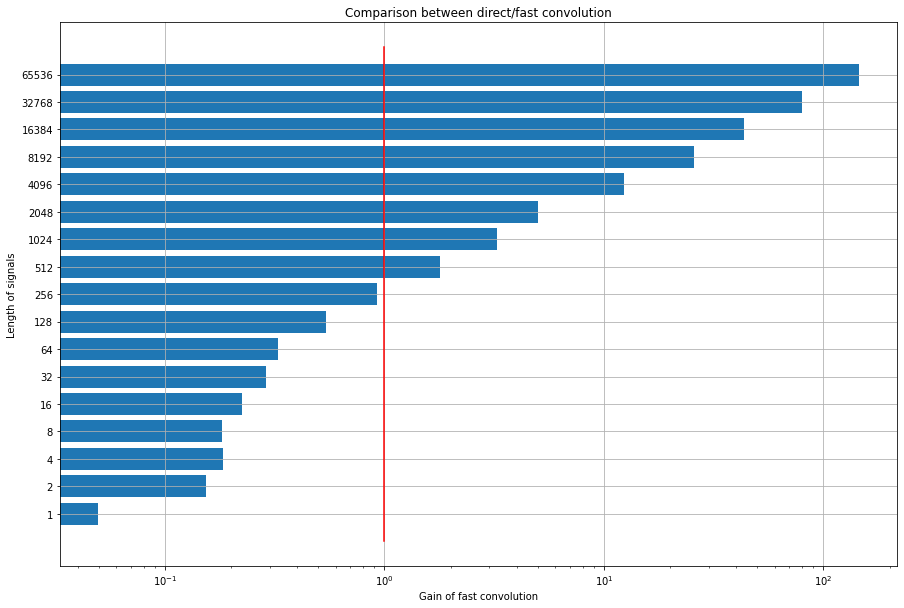

In [ ]:
import timeit

n = np.arange(17)  # lengths = 2**n to evaluate
reps = 50  # number of repetitions for timeit

gain = np.zeros(len(n))
for N in n:
    length = 2**N
    # setup environment for timeit
    tsetup = 'import numpy as np; from numpy.fft import rfft, irfft; \
            x=np.random.randn(%d); h=np.random.randn(%d)' % (length, length)
    # direct convolution
    tc = timeit.timeit('np.convolve(x, x, mode="full")', setup=tsetup, number=reps)
    # fast convolution
    tf = timeit.timeit('irfft(rfft(x, %d) * rfft(h, %d))' % (2*length, 2*length), setup=tsetup, number=reps)
    # speedup by using the fast convolution
    gain[N] = tc/tf

# show the results
plt.figure(figsize = (15, 10))
plt.barh(n, gain, log=True)
plt.plot([1, 1], [-1, n[-1]+1], 'r-')
plt.yticks(n, 2**n)
plt.xlabel('Gain of fast convolution')
plt.ylabel('Length of signals')
plt.title('Comparison between direct/fast convolution')
plt.grid()



*   When is the fast convolution more efficient/faster than a direct convolution?
La diferencia es que para tamaños de longitudes muy grandes la rapida es mas efectiva que la directa.

*   Why is it slower below a given signal length?
La la convolución rapida es mas efectiva des pues de longitudes de 2^8 dado que para valores inferiores es mas rapida la directa por los ciclos necesarios para resolverla.

*   Is the trend of the gain as expected by the numerical complexity of the FFT?
La tendencia de la ganancia numerica de la fft tiende a ser logaritmica dependiendo del tamaño propuesto.


